# N-Body Simulation

Learning goals:
* Scientific Programming
* Working with `numpy` and `astropy`
* Numerical Simulations
* Functions and `dictionaries`


## 0. Introduction

In this notebook we will simulate planetary orbits using Python, [Newtonian Gravity](https://en.wikipedia.org/wiki/Newton%27s_law_of_universal_gravitation) and [AstroPy](https://docs.astropy.org/en/stable/).

We'll start by creating a new class to represent a body in our simulation. We'll use `numpy` to calculate the forces applied to each body as they move through space. We'll also use `astropy` for astrophysical constants and unit conversion.

Our simulation will focus on implementing the Newton's law of universal gravitation:
$$
F = G \frac{m_1 m_2}{r^2},
$$
where $F$ is the force, $G$ is the [gravitational constant](https://en.wikipedia.org/wiki/Gravitational_constant), $m_1$ and $m_2$ are the masses of two bodies and $r$ is the distance between the two bodies.


# 1. Importing our packages

We'll be using the following packages:
* `numpy` - for numerical calculations in Python
* `astropy` - for converting units and getting astrophysical constants
* `matplotlib` - for making nice visualization.

In [ ]:
import numpy as np
from astropy import constants, units
import matplotlib.pyplot as plt

# 1.1 AstroPy

Let's take a look at how to use AstroPy.

In [ ]:
# Assign the variable x to be 1 m ("meter")
x = 1 * units.m
print(x)
# Convert x to cm
print(x.to(units.cm))

# Use imperial units of feet
y = 1 * units.imperial.foot
print(y)
print(y.to(units.m))

# We can add the two together and let astropy handle the conversion
z = x + y
print(z)

1.0 m
100.0 cm
1.0 ft
0.3048 m
1.3048 m


We can also import `constants` from `astropy`.

In [ ]:
# Get the speed of light
c = constants.c
print(c)
# Convert to km/s
print(c.to(units.km / units.s))
print(c.to(units.imperial.inch / units.s))



  Name   = Speed of light in vacuum
  Value  = 299792458.0
  Uncertainty  = 0.0
  Unit  = m / s
  Reference = CODATA 2018
299792.458 km / s
11802852677.165352 inch / s


For our simulation we'll use:
* $G$ - the gravitational constant
* $m_{sun}$ - the mass of the Sun
* $m_{earth}$ - the mass of the earth
* $AU$ - AU or "[astronomocial unit](https://en.wikipedia.org/wiki/Astronomical_unit)" is the average distance between the Sun and the Earth.

Since we live on Earth, we'll define the planets in our simulation in terms of Earth mass and Earth Distance (AU).


In [ ]:
G = constants.G
print(G)
print("\n----\n")
m_sun = constants.M_sun
print(m_sun)
print("\n----\n")
m_earth = constants.M_earth
print(m_earth)
print("\n----\n")
AU = constants.au
print(AU)



  Name   = Gravitational constant
  Value  = 6.6743e-11
  Uncertainty  = 1.5e-15
  Unit  = m3 / (kg s2)
  Reference = CODATA 2018

----

  Name   = Solar mass
  Value  = 1.988409870698051e+30
  Uncertainty  = 4.468805426856864e+25
  Unit  = kg
  Reference = IAU 2015 Resolution B 3 + CODATA 2018

----

  Name   = Earth mass
  Value  = 5.972167867791379e+24
  Uncertainty  = 1.3422009501651213e+20
  Unit  = kg
  Reference = IAU 2015 Resolution B 3 + CODATA 2018

----

  Name   = Astronomical Unit
  Value  = 149597870700.0
  Uncertainty  = 0.0
  Unit  = m
  Reference = IAU 2012 Resolution B2


## 1.2 Workding with arrays and units

We'll only consider 2 dimensions. This means that the location of our bodies can be represented as a 2D vector. We'll define the origin [0,0] as the centre of the Solar System.

`numpy` works well with `astropy`. Let's see how we can perform some math with units.




In [ ]:
x = np.array([1, 2]) * units.m
y = np.array([3, 4]) * units.m
print(x)
print(y)
print(x + y)

[1. 2.] m
[3. 4.] m
[4. 6.] m


Astropy also handles combining units:

In [ ]:
distances = np.array([0,1,2,3,4,5,6,7,8,9]) * units.m
times = 0.5*np.ones(len(distances))*units.s
print(distances)
print(times)
velocities = distances / times
print(velocities)
print(velocities.to(units.imperial.mile/units.hour))


[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.] m
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5] s
[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18.] m / s
[ 0.          4.47387258  8.94774517 13.42161775 17.89549034 22.36936292
 26.8432355  31.31710809 35.79098067 40.26485326] mi / h


# 2. Storing information

We'll store the information about our bodies using a `dictionary`. A `dictionary` or `dict` is a non-ordered collection of objects in Python. We can access entries in the `dict` using `key`. A `key` is simply the name that we give to an entry.


## 2.1 Working with a `dict`

We can define a dictionary with either `dict()` or using curly brackets `{}`:


In [ ]:
# Define an empty dictionary
my_dict = dict()
print(my_dict)
my_dict = {}
print(my_dict)

{}
{}


In [ ]:
# Define a dictionary with a list of floats and a key
my_dict = {
    "first_object" : [1.0, 2.0, 3.0],
    "second_object" : [4.0, 5.0, 6.0]
}
print(my_dict)

# Access an element of the dictionary using the key
print(my_dict["first_object"])

# Modify an element of one of the lists stored in the dictionary
my_dict["first_object"][0] = 10.0
print(my_dict["first_object"])


# add a new element to the dictionary
my_dict["message"] = "hello"
print(my_dict)

# Get all the keys and loop over them
my_keys = my_dict.keys()
for key in my_keys:
    print(key)
    print("\t", my_dict[key])


{'first_object': [1.0, 2.0, 3.0], 'second_object': [4.0, 5.0, 6.0]}
[1.0, 2.0, 3.0]
[10.0, 2.0, 3.0]
{'first_object': [10.0, 2.0, 3.0], 'second_object': [4.0, 5.0, 6.0], 'message': 'hello'}
first_object
	 [10.0, 2.0, 3.0]
second_object
	 [4.0, 5.0, 6.0]
message
	 hello


## 2.2 Setting up our data dictionaries

Now that we know how to use and modify dictionaries, let's look at storing some information about our solar system in a dictionary.

We'll start with 4 objects, we can get some orbital details from [here](https://nssdc.gsfc.nasa.gov/planetary/factsheet/) and [here](https://en.wikipedia.org/wiki/Titius%E2%80%93Bode_law):
* The Sun, which will be located at the centre of the solar system (0,0) and be stationary ( velocity of (0,0) ) and have a mass of 1 $m_{sun}$.
* The Earth, which will be located at 1 AU, have a mass of 1 $m_{earth}$ and an starting velocity of (0, 29.8 km/s).
* Mercury, which will be located at 0.39 AU, have a mass of 0.06 $m_{earth}$ and an starting velocity of (0, 47.4 km/s).
* Venus, which will be located at 0.72 AU, have a mass of 0.81 $m_{earth}$ and an starting velocity of (0, 35.0 km/s).
* Mars, which will be located at 1.52 AU, have a mass of 0.11 $m_{earth}$ and an starting velocity of (0, 24.1 km/s).



In [ ]:
# Store as a "dictionary of dictionaries"
def create_bodies():
  bodies = {
      "sun" : {
          "pos" : np.array([0,0]) * AU,
          "vel" : np.array([0,0]) * units.km / units.s,
          "mass" : m_sun
      },
      "earth" : {
          "pos" : np.array([1,0]) * AU,
          "vel" : np.array([0,29.8]) * units.km / units.s,
          "mass" : m_earth
      },
      "mercury" : {
          "pos" : np.array([0.39,0]) * AU,
          "vel" : np.array([0,47.4]) * units.km / units.s,
          "mass" : 0.06*m_earth
      },
      "venus" : {
          "pos" : np.array([0.72,0]) * AU,
          "vel" : np.array([0,35.0]) * units.km / units.s,
          "mass" : 0.81*m_earth
      },
      "mars" : {
          "pos" : np.array([1.52,0]) * AU,
          "vel" : np.array([0,24.1]) * units.km / units.s,
          "mass" : 0.11*m_earth
      }
  }
  return bodies

bodies = create_bodies()
print(bodies)

{'sun': {'pos': <Quantity [0., 0.] m>, 'vel': <Quantity [0., 0.] km / s>, 'mass': <<class 'astropy.constants.iau2015.IAU2015'> name='Solar mass' value=1.988409870698051e+30 uncertainty=4.468805426856864e+25 unit='kg' reference='IAU 2015 Resolution B 3 + CODATA 2018'>}, 'earth': {'pos': <Quantity [1.49597871e+11, 0.00000000e+00] m>, 'vel': <Quantity [ 0. , 29.8] km / s>, 'mass': <<class 'astropy.constants.iau2015.IAU2015'> name='Earth mass' value=5.972167867791379e+24 uncertainty=1.3422009501651213e+20 unit='kg' reference='IAU 2015 Resolution B 3 + CODATA 2018'>}, 'mercury': {'pos': <Quantity [5.83431696e+10, 0.00000000e+00] m>, 'vel': <Quantity [ 0. , 47.4] km / s>, 'mass': <Quantity 3.58330072e+23 kg>}, 'venus': {'pos': <Quantity [1.07710467e+11, 0.00000000e+00] m>, 'vel': <Quantity [ 0., 35.] km / s>, 'mass': <Quantity 4.83745597e+24 kg>}, 'mars': {'pos': <Quantity [2.27388763e+11, 0.00000000e+00] m>, 'vel': <Quantity [ 0. , 24.1] km / s>, 'mass': <Quantity 6.56938465e+23 kg>}}


# 2.3 Visualize the solar system

Let's plot the locations of the planets within our solar system:

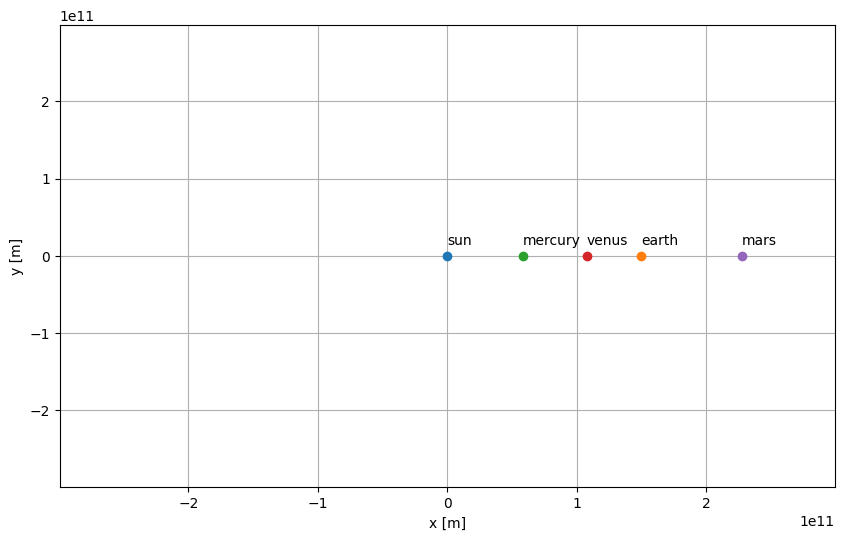

In [ ]:
fig = plt.figure(figsize = (10,6))
ax = plt.axes()
for body in bodies:
    ax.plot(bodies[body]["pos"][0], bodies[body]["pos"][1], 'o')
    # add and arrow with the planet name
    ax.annotate(body,
     (bodies[body]["pos"][0].value, bodies[body]["pos"][1].value + 0.1*AU.value)
    )

plt.ylim(-2 * AU.value ,2 * AU.value )
plt.xlim(-2 * AU.value ,2 * AU.value )
plt.ylabel("y [m]")
plt.xlabel("x [m]")
plt.grid()

This might be useful for later, let's make it into a function so that we don't need to rewrite the code:

(<Figure size 900x900 with 1 Axes>, <Axes: xlabel='x [m]', ylabel='y [m]'>)

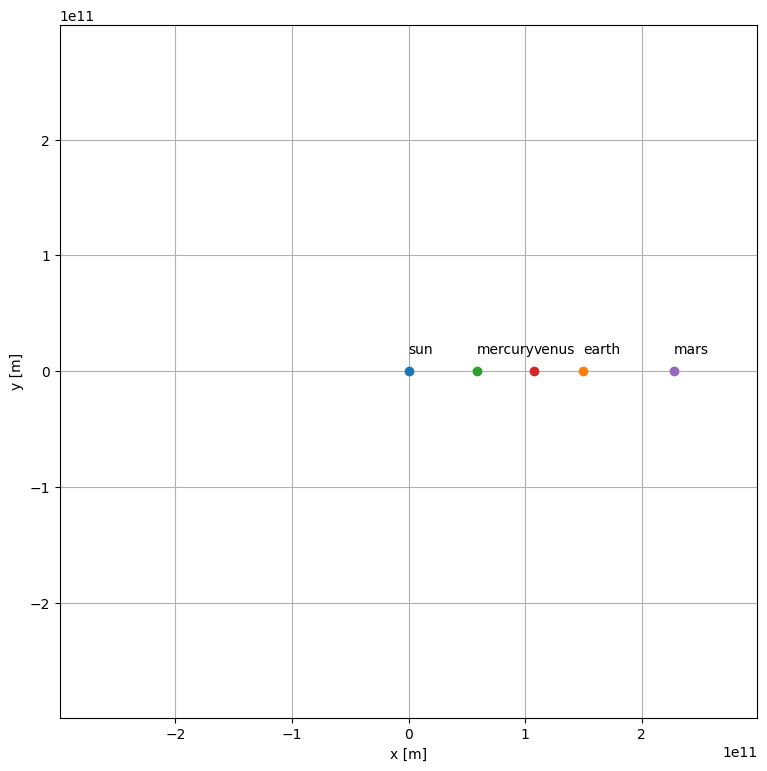

In [ ]:
def plot_system(bodies):
  fig = plt.figure(figsize = (9,9))
  ax = plt.axes()
  for body in bodies:
      ax.plot(bodies[body]["pos"][0], bodies[body]["pos"][1], 'o')
      # add and arrow with the planet name
      ax.annotate(body,
      (bodies[body]["pos"][0].value, bodies[body]["pos"][1].value + 0.1*AU.value)
      )

  plt.ylim(-2 * AU.value ,2 * AU.value )
  plt.xlim(-2 * AU.value ,2 * AU.value )
  plt.ylabel("y [m]")
  plt.xlabel("x [m]")
  plt.grid()
  return fig, ax


plot_system(bodies)

# 3. The simulation

Now that we have our data, let's look at how we're going to simulate the motions of the sun and planets.

We're going to simulate a "time step" ($\Delta t$). This means that we'll calculate some set of parameters (e.g. the acceleration) and run that for a time step (e.g. a day) and record the change in parameters (e.g. the position and velocity).

What time step should we use?
- Seconds? -> We'll be running for a very long time before we see changes
- Years? -> This is too large, we'll likely miss some details

Let's use 1 Earth day.

How can we update the position and velocity? We'll need to know the forces:
$$ F = G\frac{m_1 m_2}{r} $$

We also know how this relates to the acceleration:
$$ F = ma $$
or
$$ a = \frac{F}{m} $$

We also know that the acceleration can be represented as the change in velocity (calculus):
$$ a = \frac{dv}{dt} $$
If we deal with finite time steps giving a finite change in velocity:
$$ a = \frac{\Delta v}{\Delta t} $$
Rearranging and combing with our relation for the acceleration:
$$\Delta v = \frac{F}{m} \Delta t $$
For time step $\Delta t$ we can now calculate the change in velocity of the body.

Similarly the change in position of the body can be calculated as:
$$ x = x_{old} + v \Delta t,$$
Where $v = v_{old} \Delta t$, $x_{old}$ and $v_{old}$ are the position and velocity from the previous step of the code.

Because we have many bodies within our simulation, we'll need to account for the force of gravity from all bodies. The force on body $i$ is:
$$
F_{i} = \sum_{j = 0, j\neq i} G\frac{m_i m_j}{r_{ij}}
$$
Where $r_{ij}$ is the distance between bodies $i$ and $j$. Note we're skipping $i ==j $. This is the case when we're getting the force on a body, when the second body is itself. Here $r_{ij} = 0$ and would result in infinite force ($\frac{1}{0} \rightarrow \infty$), in reality the body doesn't experience any force due to itself so it is safe to ignore this term.

So for our simulation we have the follow steps:
1. Apply the time step $\Delta t$.
2. Determine the forces on each body due to each other body.
3. Using the force, calculate the acceleration ($a$) and get the change in velocity $\Delta v$.
4. Applying Update the velocity and positions for each body.


# 3.1 Setting up the simulation

It will also be useful to record some of the simulated values. Let's store the (x,y) position and velocity for each body.

We'll run our simulation for 10 earth years with a time resolution of 1 day.


In [ ]:
delta_t = 1 * units.day
duration = 10 * units.year
n_steps = int(duration / delta_t)
# We'll run for this number of steps
print(n_steps)

3652


In [ ]:
n_bodies = len(bodies)
# Let's store our data as numpy arrays
x_loc = np.zeros((n_bodies, n_steps)) * units.m
y_loc = np.zeros((n_bodies, n_steps)) * units.m
x_vel = np.zeros((n_bodies, n_steps)) * units.m / units.s
y_vel = np.zeros((n_bodies, n_steps)) * units.m / units.s

# 3.2 Determining the forces

Let's write a function to get the forces on each body.

In [ ]:
def get_forces(bodies):
  forces = np.zeros((n_bodies, 2))
  for i, body1 in enumerate(bodies):
    for j, body2 in enumerate(bodies):
      if i != j:
        # Get the vector representation of the distace
        r = bodies[body2]["pos"] - bodies[body1]["pos"]
        # Get the absolute distance
        # sqrt((x1-x2)^2 + (y1-x2)^2)
        distance = np.linalg.norm(r)
        # Newtonian Gravity
        f = G * bodies[body1]["mass"] * bodies[body2]["mass"] / distance**2
        # Get the vector of forces
        # using r and distance to get the fraction of force in x and y directions
        # Strip the units and only add the value
        tmp = f * r / distance
        forces[i] += tmp.value
  # Add the units back in
  return forces * tmp.unit


In [ ]:
%timeit get_forces(bodies)

NameError: name 'bodies' is not defined

Let's write a function to update the positions and velocities


In [ ]:
def update_positions_and_velocities(bodies, forces):
  for i, body in enumerate(bodies):
    # Update velocity based on force and mass
    bodies[body]["vel"] += forces[i] / bodies[body]["mass"] * delta_t
    # Update position based on velocity
    bodies[body]["pos"] += bodies[body]["vel"] * delta_t


bodies = create_bodies()

print(bodies["earth"]["pos"])
print(bodies["earth"]["vel"])
forces = get_forces(bodies)
update_positions_and_velocities(bodies, forces)
print(bodies["earth"]["pos"])
print(bodies["earth"]["vel"][0])

# 4. Running our simulation

We'll run our simulation for 10 earth years with a time resolution of 1 day.
Let's also use [tqdm](https://github.com/tqdm/tqdm) to get a progress bar.

In [ ]:
# Create a new set of bodies
bodies = create_bodies()
from tqdm import tqdm
for i in tqdm(range(n_steps)):
  # get the forces
  forces = get_forces(bodies)
  # apply the forces and update the positions
  update_positions_and_velocities(bodies, forces)
  # Store locations
  for j, body in enumerate(bodies):
    x_loc[j, i] = bodies[body]["pos"][0]
    y_loc[j, i] = bodies[body]["pos"][1]
    x_vel[j, i] = bodies[body]["vel"][0]
    y_vel[j, i] = bodies[body]["vel"][1]

100%|██████████| 3652/3652 [00:34<00:00, 104.72it/s]


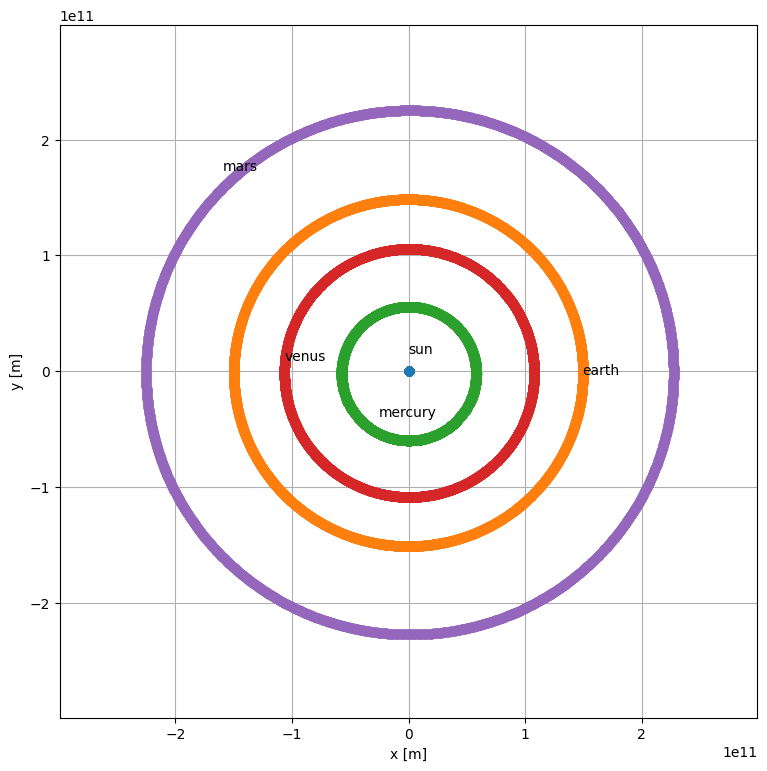

In [ ]:
# Let's visualise the data

fig = plt.figure(figsize = (9,9))
ax = plt.axes()
for i, body in enumerate(bodies):
    ax.plot(x_loc[i], y_loc[i], 'o')
    # add and arrow with the planet name
    ax.annotate(body,
    (bodies[body]["pos"][0].value, bodies[body]["pos"][1].value + 0.1*AU.value)
    )

plt.ylim(-2 * AU.value ,2 * AU.value )
plt.xlim(-2 * AU.value ,2 * AU.value )
plt.ylabel("y [m]")
plt.xlabel("x [m]")
plt.grid()

Let's make an animation of the above to see the motion of the planets

<ipython-input-19-80aad0a1dc92>:19: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  scatters[i].set_data(x_loc[i,frame].value, y_loc[i,frame].value)


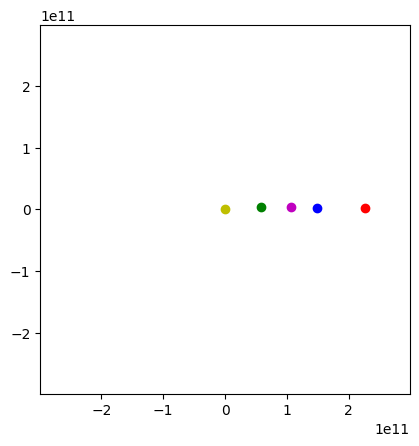

<ipython-input-19-80aad0a1dc92>:19: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  scatters[i].set_data(x_loc[i,frame].value, y_loc[i,frame].value)


In [ ]:
from matplotlib.animation import FuncAnimation, PillowWriter

colors_key = {
    "sun" : "y",
    "earth" : "b",
    "mercury" : "g",
    "venus" : "m",
    "mars" : "r"
}

fig, ax = plt.subplots()
ax.set_aspect('equal')
ax.set_xlim(-2 * AU.value, 2 * AU.value)
ax.set_ylim(-2 * AU.value, 2 * AU.value)
scatters = [ax.plot([], [], 'o', color=colors_key[body])[0] for body in bodies]

def animate(frame):
    for i, body in enumerate(bodies):
        scatters[i].set_data(x_loc[i,frame].value, y_loc[i,frame].value)
    return scatters

anim = FuncAnimation(fig, animate, frames=n_steps, interval=1, blit=True)

plt.show()
anim.save("solar.gif", writer=PillowWriter(fps=2))

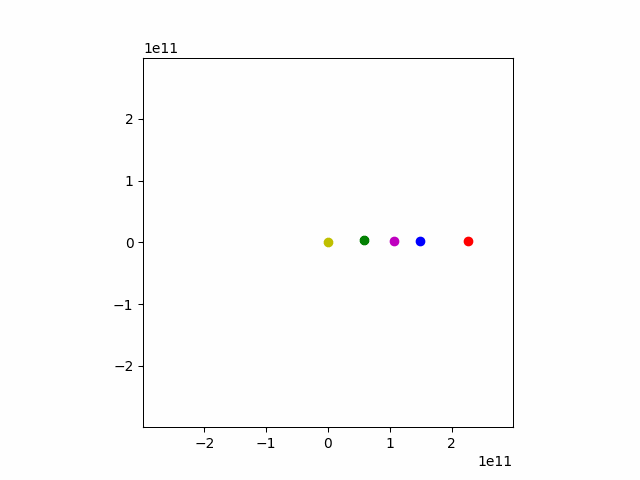

In [ ]:
from IPython.display import Image
Image('solar.gif')

# 5. What's next?

We can use this base simulation to study our solar system. Here are some interesting extensions:
* How do the orbits change over time? Does the distance remain constant, does it change?
* Where is the centre of gravity of the solar system? In reality we say planets and stars orbit about the [centre of mass/gravity](https://en.wikipedia.org/wiki/Center_of_mass) or [barycentre](https://en.wikipedia.org/wiki/Barycenter_(astronomy)).
* What happens to the Sun? Does it remain in a fixed location? Is the mass of the planets enough to move the Sun?
* What is the impact of larger planet? Jupiter is the largest planet in our solar system, how does its inclusion effect the motion of the other planets and the Sun?
* Planetary defence? Jupiter plays an important role in "cleaning" the solar system of asteroid.
* How are the asteroids such as those in the astroid belt and the [Trojans](https://en.wikipedia.org/wiki/Jupiter_trojan) effected by Jupiter?
* Can we detect the signature of planets on the orbital behaviour of other planets?
* Can we predict the effect of hypothectical planets?
* [Planet 9](https://en.wikipedia.org/wiki/Planet_Nine) is an hypothetical planet that would exist in the outer solar system
* [Vulcan](https://en.wikipedia.org/wiki/Vulcan_(hypothetical_planet)) is a hypothtical planet that was of interest in early solar system modelling.
* Stars don't always exist by themselves. What would happen to our solar system if we additional Stars. Can we model some of our favourite real of Scifi systems:
* [Trappist-1](https://en.wikipedia.org/wiki/TRAPPIST-1)
* [Tatooine (Star Wars)](https://en.wikipedia.org/wiki/Tatooine)
* [Trisolaris (Alpha Centauri, Three Body Problem)](https://en.wikipedia.org/wiki/Tatooine)
* Can we use this to simulate the long term light curve of a star?
* Can we use [Kepler's Laws](https://en.wikipedia.org/wiki/Kepler%27s_laws_of_planetary_motion) to simulate hypothetical solar systems?
